# Edge detection tests

In [16]:
import numpy as np
from skimage.morphology import disk
from skimage import exposure, feature, morphology
from skimage.filters import gaussian, meijering, sato, frangi, hessian
from PIL import Image
from matplotlib import pyplot as plt

from script_tp2 import *

In [2]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_mask = masking(img)
img_rescaled = img
img_rescaled[img_mask == 1] = exposure.rescale_intensity(img[img_mask == 1])

# Idea 1 : Canny

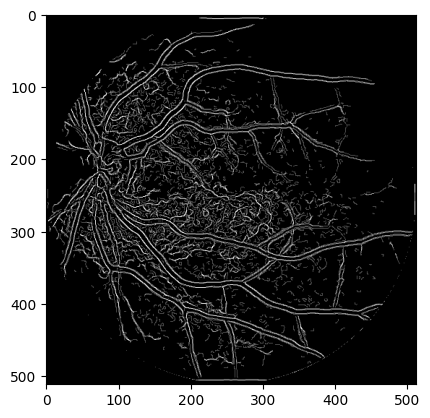

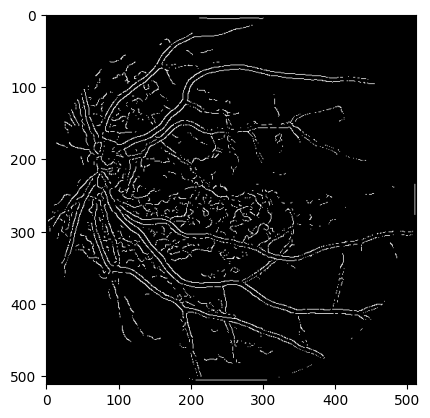

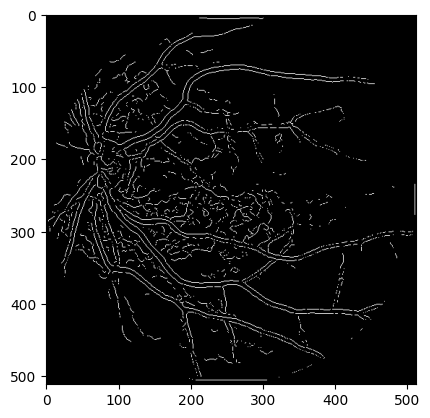

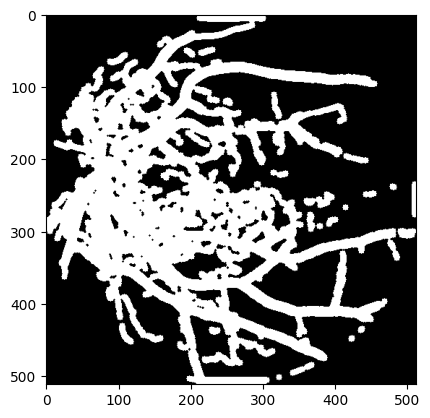

In [3]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

sigmas = [1, 2, 3]
img_edge_canny = []

for sigma in sigmas:
    edges = feature.canny(img_rescaled, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold, use_quantiles=True, mask = img_mask)
    # Store the edge map
    img_edge_canny.append(edges)

# Combine edge maps from different scales
combined_edges = sum(img_edge_canny)  # Or use any appropriate combination method
plt.imshow(combined_edges, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = combined_edges > 1.5
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

img_thin = morphology.thin(thresholded_edges)
plt.imshow(img_thin, cmap='grey')
plt.show()

img_dilation = morphology.dilation(img_thin, disk(dilation_disk))
img_closing = morphology.erosion(img_dilation, disk(erosion_disk))
plt.imshow(img_closing, cmap='grey')
plt.show()



In [4]:
img_out = img_closing
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
f1score = evaluate(img_out, img_GT)[2]
print(f1score)

0.4932950191570881


# 2. Idea 2 : Top-hat

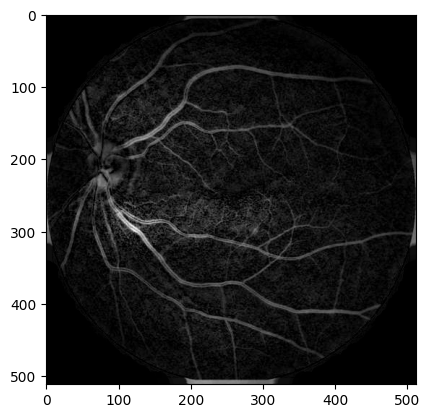

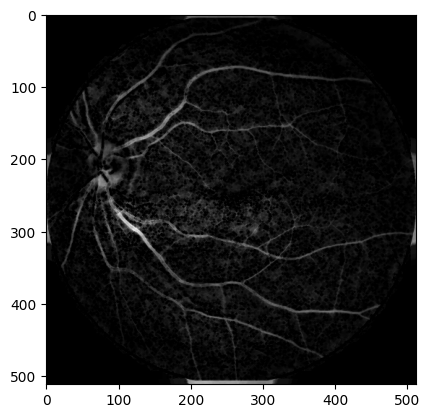

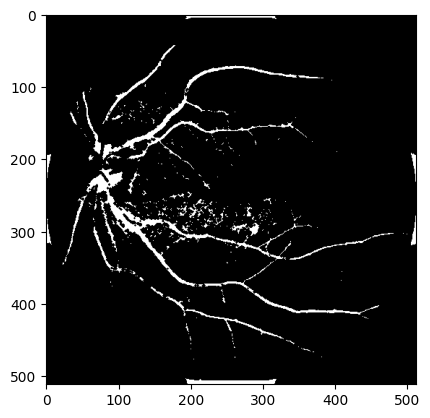

In [12]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

img_top_hat = morphology.black_tophat(img_rescaled, disk(10))
plt.imshow(img_top_hat, cmap='grey')
plt.show()

img_erosion = morphology.erosion(img_top_hat, disk(erosion_disk))
plt.imshow(img_erosion, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = img_erosion > 25
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

# img_thin = morphology.thin(thresholded_edges)
# plt.imshow(img_thin, cmap='grey')
# plt.show()

In [15]:
img_out = thresholded_edges
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

0.6286910020925366
0.4675773819816704
0.5362951209837367


# 3. Idée 3 : Ridge operators

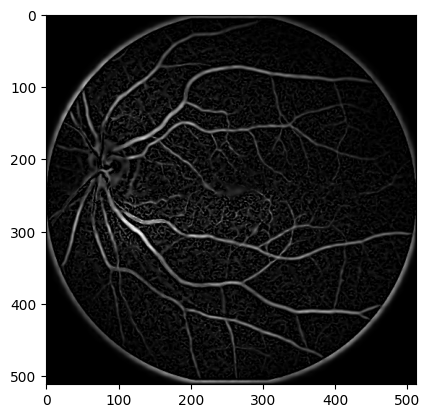

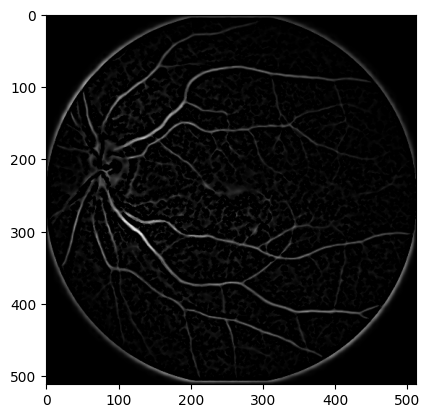

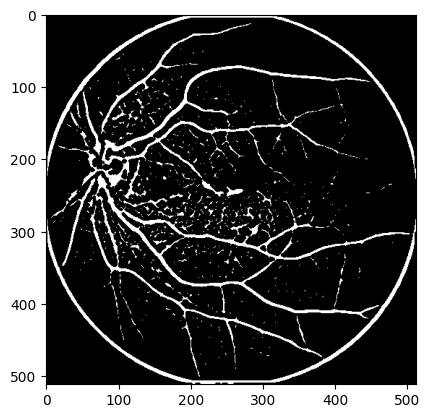

In [31]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

img_meijering = meijering(img_rescaled, sigmas=[1, 2, 3])
img_masked = img_meijering[img_mask==1]
plt.imshow(img_meijering, cmap='grey')
plt.show()

img_erosion = morphology.erosion(img_meijering, disk(erosion_disk))
plt.imshow(img_erosion, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = img_erosion > 0.1
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

In [32]:
img_out = thresholded_edges
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

0.5153294194390085
0.6870760132196904
0.5889369315640375
